In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/kaggle/input/xlm-embeddings-llmdetectdataset2/preprocessed_LLMDetect_with_XLM2_embeddings.csv')

# Convert the string of embeddings into a list of floats by removing brackets and commas
df['XLMRoberta2_embeddings'] = df['XLMRoberta2_embeddings'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' '))

# Display the first row to confirm the format
print(df[['cleaned_text', 'XLMRoberta2_embeddings']].head())

                                        cleaned_text  \
0  carfree city become subject increasing interes...   
1  car free city carfree city concept gaining tra...   
2  sustainable urban future carfree city emerging...   
3  pioneering sustainable urban living era marked...   
4  path sustainable urban living age rapid urbani...   

                              XLMRoberta2_embeddings  
0  [0.084726952, 0.0720160678, 0.0551198646, -0.0...  
1  [0.0855521038, 0.0706822053, 0.0573787615, -0....  
2  [0.0800648257, 0.0735276416, 0.0573213696, -0....  
3  [0.0857378021, 0.0786311328, 0.0562351868, -0....  
4  [0.0910858363, 0.0745356828, 0.0582337156, -0....  


In [3]:
# Prepare the feature matrix (X) and labels (y)
X = np.vstack(df['XLMRoberta2_embeddings'].values)  # Stack embeddings into a 2D array
y = df['label']  # Replace 'label' with the actual name of your label column if different

In [4]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from xgboost import XGBClassifier
# Initialize and train the XGBoost Classifier with optimized parameters
xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42, eval_metric='logloss')

In [7]:
# Lists to store accuracy at each iteration
train_accuracies = []
test_accuracies = []

In [8]:
for i in range(1, xgb.n_estimators + 1):
    xgb.set_params(n_estimators=i)  # Incrementally increase the number of estimators
    xgb.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    train_pred = xgb.predict(X_train)
    test_pred = xgb.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

In [9]:
train_accuracies

[0.599116486532853,
 0.599116486532853,
 0.599116486532853,
 0.896551724137931,
 0.9267026934294047,
 0.9422714016126266,
 0.9483187510722251,
 0.9525647623949219,
 0.9563389946817636,
 0.9594270029164522,
 0.9607565620174987,
 0.9613570080631326,
 0.96260078915766,
 0.9640161262652256,
 0.9648310173271574,
 0.9662892434379825,
 0.9675330245325099,
 0.9680905815748841,
 0.968991250643335,
 0.9695916966889689,
 0.9704065877509007,
 0.9710499227997942,
 0.9716932578486875,
 0.972336592897581,
 0.9734088179790702,
 0.9740092640247041,
 0.9744810430605593,
 0.9751243781094527,
 0.9758534911648653,
 0.9761537141876823,
 0.9768399382398353,
 0.9770972722593927,
 0.977955052324584,
 0.9777406073082862,
 0.9784268313604392,
 0.9790272774060731,
 0.9790272774060731,
 0.9798850574712644,
 0.9800995024875622,
 0.9804426145136387,
 0.9808286155429747,
 0.9817292846114256,
 0.9821581746440212,
 0.982672842683136,
 0.9829301767026934,
 0.9830588437124721,
 0.9833161777320295,
 0.9837021787613656,
 0

In [10]:
test_accuracies

[0.6071367301423914,
 0.6071367301423914,
 0.6071367301423914,
 0.895865500085778,
 0.9243437982501287,
 0.9365242751758449,
 0.9414993995539543,
 0.9447589638016812,
 0.9478469720363699,
 0.9497340881797907,
 0.9516212043232115,
 0.951278092297135,
 0.9531652084405559,
 0.953336764453594,
 0.9540229885057471,
 0.9547092125579002,
 0.9545376565448619,
 0.9536798764796706,
 0.9559101046491679,
 0.9552238805970149,
 0.9564247726882827,
 0.9579687768056271,
 0.9586550008577801,
 0.9586550008577801,
 0.9593412249099331,
 0.9588265568708183,
 0.9589981128838566,
 0.9591696688968948,
 0.9596843369360096,
 0.9603705609881626,
 0.9598558929490478,
 0.9615714530794305,
 0.9622576771315835,
 0.9627723451706982,
 0.9629439011837365,
 0.9624292331446217,
 0.96260078915766,
 0.9638016812489277,
 0.9627723451706982,
 0.9634585692228512,
 0.9638016812489277,
 0.9644879053010808,
 0.9650025733401956,
 0.9653456853662721,
 0.9662034654314634,
 0.9662034654314634,
 0.9665465774575399,
 0.966718133470578

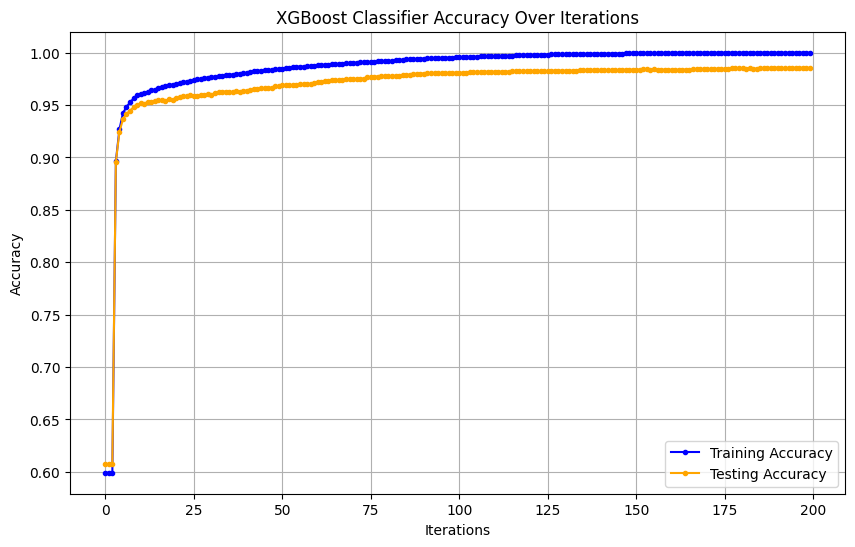

In [11]:
# Plot accuracy over iterations
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label='Training Accuracy', color='blue', marker='o', markersize=3)
plt.plot(test_accuracies, label='Testing Accuracy', color='orange', marker='o', markersize=3)
plt.title('XGBoost Classifier Accuracy Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

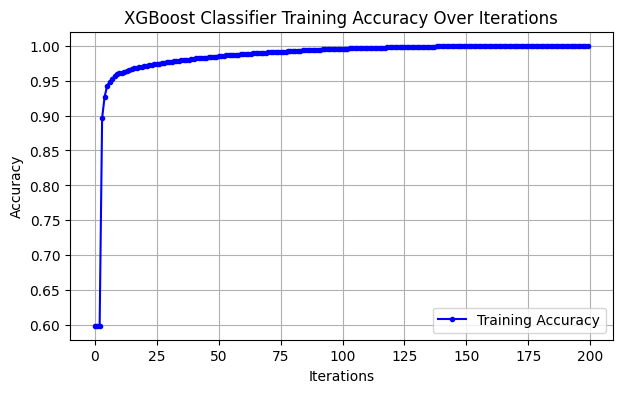

In [13]:
# Plot accuracy over iterations
plt.figure(figsize=(7, 4))
plt.plot(train_accuracies, label='Training Accuracy', color='blue', marker='o', markersize=3)
plt.title('XGBoost Classifier Training Accuracy Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

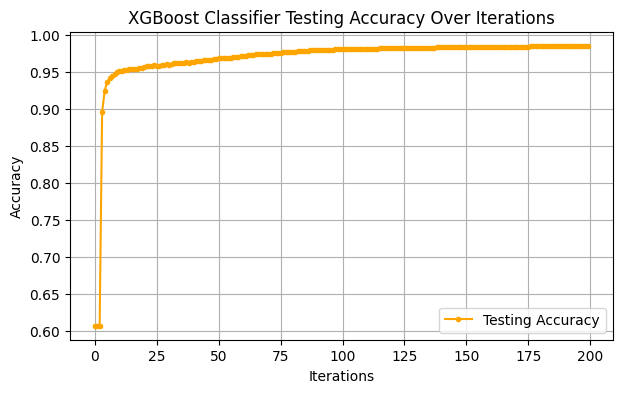

In [14]:
# Plot accuracy over iterations
plt.figure(figsize=(7, 4))
plt.plot(test_accuracies, label='Testing Accuracy', color='orange', marker='o', markersize=3)
plt.title('XGBoost Classifier Testing Accuracy Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [15]:
# Make predictions on the test set
y_pred = xgb.predict(X_test)

In [16]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [17]:
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3539
           1       0.99      0.98      0.98      2290

    accuracy                           0.99      5829
   macro avg       0.99      0.98      0.98      5829
weighted avg       0.99      0.99      0.99      5829



In [18]:
import matplotlib.pyplot as plt

# Initialize XGBClassifier with eval_metric in the constructor
xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42, eval_metric='logloss')

# Initialize an empty dictionary to store evaluation results
evals_result = {}

# Fit the model with eval_set to track log loss over iterations
xgb.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test, y_test)], 
        verbose=False)

# Extract log loss from the evaluation result
train_losses = xgb.evals_result()['validation_0']['logloss']
test_losses = xgb.evals_result()['validation_1']['logloss']


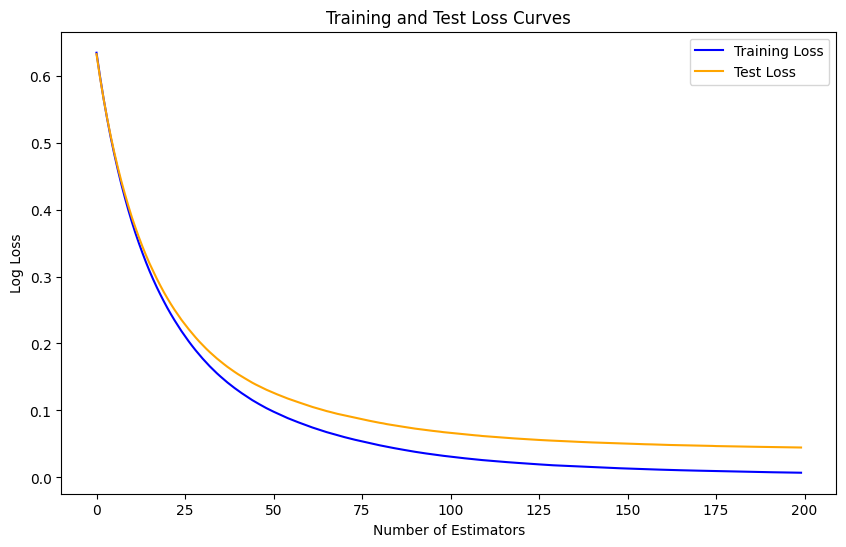

In [19]:
# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Training Loss", color='blue')
plt.plot(test_losses, label="Test Loss", color='orange')
plt.xlabel("Number of Estimators")
plt.ylabel("Log Loss")
plt.title("Training and Test Loss Curves")
plt.legend()
plt.show()


In [21]:
# Plot the loss curves
plt.figure(figsize=(7, 4))
plt.plot(train_losses, label="Training Loss", color='blue')
plt.ylabel("Log Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()

In [22]:
# Plot the loss curves
plt.figure(figsize=(7, 4))
plt.plot(test_losses, label="Test Loss", color='orange')
plt.xlabel("Number of Estimators")
plt.ylabel("Log Loss")
plt.title(" Test Loss Curve")
plt.legend()
plt.show()

In [23]:
import pandas as pd
from tabulate import tabulate

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Train Accuracy': train_accuracies,
    'Train Loss': train_losses,
    'Test Accuracy': test_accuracies,
    'Test Loss': test_losses
})


# Display the DataFrame as a table with borders
print(tabulate(metrics_df, headers='keys', tablefmt='grid'))

+-----+------------------+--------------+-----------------+-------------+
|     |   Train Accuracy |   Train Loss |   Test Accuracy |   Test Loss |
+=====+==================+==============+=================+=============+
|   0 |         0.599116 |   0.634197   |        0.607137 |   0.632094  |
+-----+------------------+--------------+-----------------+-------------+
|   1 |         0.599116 |   0.598362   |        0.607137 |   0.597097  |
+-----+------------------+--------------+-----------------+-------------+
|   2 |         0.599116 |   0.565611   |        0.607137 |   0.565387  |
+-----+------------------+--------------+-----------------+-------------+
|   3 |         0.896552 |   0.535778   |        0.895866 |   0.536512  |
+-----+------------------+--------------+-----------------+-------------+
|   4 |         0.926703 |   0.508183   |        0.924344 |   0.510076  |
+-----+------------------+--------------+-----------------+-------------+
|   5 |         0.942271 |   0.483189 

In [32]:
# Sample classification report data
report = {
    'Human-Written': {'precision': 0.99, 'recall': 0.99, 'f1-score': 0.99, 'support': 3539},
    'Machine-Generated': {'precision': 0.99, 'recall': 0.98, 'f1-score': 0.98, 'support': 2290}
}

In [33]:
# Convert the classification report into a DataFrame
report_df = pd.DataFrame(report).T

In [34]:
# Plotting
labels = report_df.index
x = np.arange(len(labels))  # The label locations

In [35]:
# Set width of the bars
width = 0.10

fig, ax = plt.subplots(figsize=(7, 4))

# Create bars for precision, recall, and F1-score
bars1 = ax.bar(x - width, report_df['precision'], width, label='Precision', color='blue')
bars2 = ax.bar(x, report_df['recall'], width, label='Recall', color='orange')
bars3 = ax.bar(x + width, report_df['f1-score'], width, label='F1-score', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding value annotations on top of the bars
def add_value_annotations(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
